In [28]:
from sklearn import tree
import pydotplus
import pandas as pd
from IPython.display import Image

In [29]:
temperature_annual = pd.read_csv('Temperature-change-annual.csv')
temperature_annual

Year  Temperature departure  Warmest year ranking Climate Climate feel
0   1948                   -0.2                    53    Cool  Normal cool
1   1949                   -0.2                    54    Cool  Normal cool
2   1950                   -1.3                    70    Cool  Normal cool
3   1951                   -0.6                    65    Cool  Normal cool
4   1952                    0.8                    19     Hot     High hot
..   ...                    ...                   ...     ...          ...
66  2014                    0.6                    26     Hot     High hot
67  2015                    1.3                    13     Hot     High hot
68  2016                    2.1                     4     Hot     High hot
69  2017                    1.5                    10     Hot     High hot
70  2018                    0.5                    29     Hot   Normal hot

[71 rows x 5 columns]

In [30]:
dummi_data = temperature_annual.iloc[:, 0:4].values
dummi_data

array([[1948, -0.2, 53, 'Cool'],
       [1949, -0.2, 54, 'Cool'],
       [1950, -1.3, 70, 'Cool'],
       [1951, -0.6, 65, 'Cool'],
       [1952, 0.8, 19, 'Hot'],
       [1953, 0.8, 20, 'Hot'],
       [1954, 0.2, 44, 'Hot'],
       [1955, -0.2, 52, 'Cool'],
       [1956, -0.8, 68, 'Cool'],
       [1957, -0.3, 60, 'Cool'],
       [1958, 0.5, 30, 'Cool'],
       [1959, -0.4, 61, 'Cool'],
       [1960, 0.4, 32, 'Cool'],
       [1961, -0.2, 57, 'Cool'],
       [1962, -0.1, 46, 'Cool'],
       [1963, 0.2, 37, 'Hot'],
       [1964, -0.6, 64, 'Cool'],
       [1965, -0.6, 66, 'Cool'],
       [1966, -0.3, 59, 'Cool'],
       [1967, -0.4, 62, 'Cool'],
       [1968, 0.2, 39, 'Cool'],
       [1969, 0.4, 36, 'Cool'],
       [1970, -0.2, 56, 'Cool'],
       [1971, -0.1, 45, 'Cool'],
       [1972, -2.0, 71, 'Cool'],
       [1973, 0.6, 23, 'Cool'],
       [1974, -0.8, 67, 'Cool'],
       [1975, -0.1, 49, 'Cool'],
       [1976, 0.5, 41, 'Hot'],
       [1977, 1.0, 15, 'Hot'],
       [1978, -0.5, 63, 'Co

In [31]:
temperature_annual = temperature_annual[['Year', 'Temperature departure','Warmest year ranking',
                                                   'Climate','Climate feel']]
temperature_annual

Year  Temperature departure  Warmest year ranking Climate Climate feel
0   1948                   -0.2                    53    Cool  Normal cool
1   1949                   -0.2                    54    Cool  Normal cool
2   1950                   -1.3                    70    Cool  Normal cool
3   1951                   -0.6                    65    Cool  Normal cool
4   1952                    0.8                    19     Hot     High hot
..   ...                    ...                   ...     ...          ...
66  2014                    0.6                    26     Hot     High hot
67  2015                    1.3                    13     Hot     High hot
68  2016                    2.1                     4     Hot     High hot
69  2017                    1.5                    10     Hot     High hot
70  2018                    0.5                    29     Hot   Normal hot

[71 rows x 5 columns]

In [32]:
temperature_data = pd.get_dummies(read_temperature_annual)
temperature_data

Year  Temperature departure  Warmest year ranking  Climate_Cool  \
0   1948                   -0.2                    53             1   
1   1949                   -0.2                    54             1   
2   1950                   -1.3                    70             1   
3   1951                   -0.6                    65             1   
4   1952                    0.8                    19             0   
..   ...                    ...                   ...           ...   
66  2014                    0.6                    26             0   
67  2015                    1.3                    13             0   
68  2016                    2.1                     4             0   
69  2017                    1.5                    10             0   
70  2018                    0.5                    29             0   

    Climate_Hot  Climate feel_High cool  Climate feel_High hot  \
0             0                       0                      0   
1             0                       0                      0   
2             0                       0                      0   
3             0                       0                      0   
4             1                       0                      1   
..          ...                     ...                    ...   
66            1                       0                      1   
67            1                       0                      1   
68            1                       0                      1   
69            1                       0                      1   
70            1                       0                      0   

    Climate feel_Normal cool  Climate feel_Normal hot  
0                          1                        0  
1                          1                        0  
2                          1                        0  
3                          1                        0  
4                          0                        0  
..                       ...                      ...  
66                         0                        0  
67                         0                        0  
68                         0                        0  
69                         0                        0  
70                         0                        1  

[71 rows x 9 columns]

In [33]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(temperature_data, temperature_annual['Climate'])
clf_train = clf.fit(temperature_data, temperature_annual['Climate feel'])

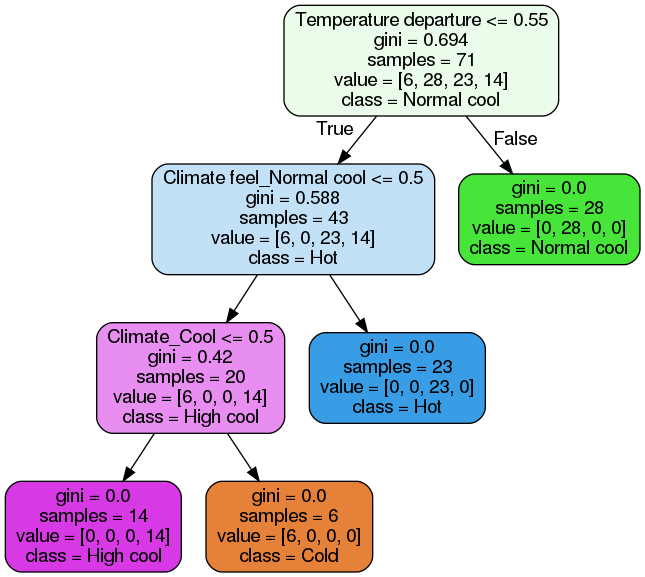

In [34]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(temperature_data.columns.values), 
                                class_names=['Cold', 'Normal cool', 'Hot', 'High cool', 'Normal hot', 
                                             'High hot'],
                                rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())